In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

2022-07-21 01:36:43.094374: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
''' train and test path '''
train_path = '../input/brain-tumor-classification-mri/Training'
test_path = '../input/brain-tumor-classification-mri/Testing'

In [3]:
File=[]
for f in os.listdir(train_path):
    File += [f]

'''  total number of classes '''
print(File)

['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']


In [4]:
''' reading images '''

train_data = []

''' label encoding '''
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}

count=0

for f in os.listdir(train_path):
    ''' joining path '''
    path = os.path.join(train_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling  '''
        img = img / 255.0
        ''' appending image to train_data '''
        train_data.append([img, count])     
    count=count+1

In [5]:
test_data = []

''' label encoding '''
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}
count=0

for f in os.listdir(test_path):
    ''' joining path '''
    path=os.path.join(test_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling '''
        img = img/255.0
        ''' appending an image to test_data'''
        test_data.append([img, count])         
    count=count+1

In [6]:
train_images, train_labels = zip(*train_data)
test_images, test_labels = zip(*test_data)

In [7]:
''' converting labels into to_categorical '''
train_labels = to_categorical(train_labels)

''' coverting train_images into numpy array '''
train_images = np.array(train_images)

''' converting train_labesl into numpy array '''
train_labels = np.array(train_labels)

''' shaep of train_images and train_labels '''
print(train_images.shape)
print(train_labels.shape)

(2870, 150, 150, 3)
(2870, 4)


In [8]:
''' converting labels into to_categorical '''
test_labels = to_categorical(test_labels)

''' coverting test_images into numpy array '''
test_images = np.array(test_images)

''' converting train_labesl into numpy array '''
test_labels = np.array(test_labels)

''' shaep of test_images and test_labels '''
print(test_images.shape)
print(test_labels.shape)

(394, 150, 150, 3)
(394, 4)


In [9]:
''' reshaping images '''
train_images = train_images.reshape(-1,150,150,3)
test_images = test_images.reshape(-1,150,150,3)

In [10]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(train_images,train_labels, test_size=0.2,random_state=44)

In [11]:
''' shape of X_train, X_test, y_train, y_test '''
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2296, 150, 150, 3)
(574, 150, 150, 3)
(2296, 4)
(574, 4)


In [12]:
''' shape of X_train, X_test, y_train, y_test '''
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2296, 150, 150, 3)
(574, 150, 150, 3)
(2296, 4)
(574, 4)


In [13]:
''' data Augmentation '''
data_aug = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20, zoom_range=0.2,
                    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.1, fill_mode="nearest")

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10,verbose=1)

In [15]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense
vgg = VGG16(input_shape=(150,150,3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
  

  
  # useful for getting number of classes

  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(4, activation='softmax')(x)

# create a model object
model3 = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model3.summary()

# tell the model what cost and optimization method to use
model3.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

2022-07-21 01:37:10.206060: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-21 01:37:10.209621: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-07-21 01:37:10.270306: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 01:37:10.270998: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-07-21 01:37:10.271056: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-07-21 01:37:10.316125: I tensorflow/stream_executor/platform/def

58892288/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [16]:
history1 = model3.fit(data_aug.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=20,callbacks=[early_stopping])
model3.save("model_2_vgg.h5")
model3.save_weights('mine_model_weights_1.h5')

2022-07-21 01:37:13.277582: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-21 01:37:13.284342: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000179999 Hz


Epoch 1/20


2022-07-21 01:37:14.034991: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-07-21 01:37:14.889551: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-07-21 01:37:14.915782: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


72/72 [==============================] - 23s 199ms/step - loss: 1.1775 - accuracy: 0.4899 - val_loss: 0.7098 - val_accuracy: 0.7456
Epoch 2/20
72/72 [==============================] - 12s 169ms/step - loss: 0.7859 - accuracy: 0.6868 - val_loss: 0.6417 - val_accuracy: 0.7753
Epoch 3/20
72/72 [==============================] - 12s 161ms/step - loss: 0.6755 - accuracy: 0.7347 - val_loss: 0.6515 - val_accuracy: 0.7613
Epoch 4/20
72/72 [==============================] - 12s 161ms/step - loss: 0.6620 - accuracy: 0.7410 - val_loss: 0.6647 - val_accuracy: 0.7596
Epoch 5/20
72/72 [==============================] - 12s 170ms/step - loss: 0.5998 - accuracy: 0.7591 - val_loss: 0.6068 - val_accuracy: 0.7753
Epoch 6/20
72/72 [==============================] - 12s 160ms/step - loss: 0.6045 - accuracy: 0.7563 - val_loss: 0.6025 - val_accuracy: 0.7875
Epoch 7/20
72/72 [==============================] - 11s 159ms/step - loss: 0.5516 - accuracy: 0.7949 - val_loss: 0.5664 - val_accuracy: 0.7944
Epoch 8/20

In [17]:
y_pred=model3.predict(X_test)

''' retreiving max val from predicted values '''
pred = np.argmax(y_pred,axis=1)

''' retreiving max val from actual values '''
ground = np.argmax(y_test,axis=1)

''' classificaion report '''
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.71      0.88      0.78        81
           1       0.77      0.99      0.86       157
           2       0.89      0.54      0.67       170
           3       0.80      0.82      0.81       166

    accuracy                           0.79       574
   macro avg       0.79      0.81      0.78       574
weighted avg       0.81      0.79      0.78       574



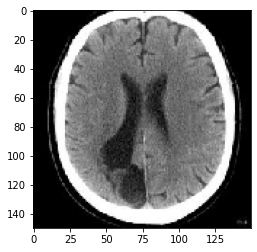

In [18]:
''' predicion on new data '''

''' loading an image '''
img = load_img("../input/brain-tumor-classification-mri/Testing/no_tumor/image(13).jpg",target_size=(150,150))
plt.imshow(img)
''' converting img to array '''
img = img_to_array(img) 

''' scaling '''
img = img / 255.0

''' expanding dimensions '''
img = np.expand_dims(img, axis=0)

In [19]:
lbl_encoding = {0:'no_tumor', 1:'pituitary_tumor', 2:'meningioma_tumor', 3:'glioma_tumor'}

def map_label(val):
    return lbl_encoding[val]

''' predicion '''
pred = model3.predict(img)

''' retreiving max val from predited values'''
val = np.argmax(pred)
map_val  = map_label(val)

print("Prediction is {}.".format(map_val))

Prediction is no_tumor.
